In [1]:
import sys
import os
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
sys.path.append('..')
warnings.filterwarnings("ignore")

In [3]:
from realseries.models.vae_ad import VAE_AD
from realseries.utils.evaluation import point_metrics, adjust_predicts, adjust_metrics
from realseries.utils.data import load_Yahoo, load_NAB
from realseries.utils.visualize import plot_anom

In [4]:
num_epochs=256
batch_size=256
lr=1e-3
lr_decay=0.8
clip_norm_value=12.0
weight_decay=1e-3
data_split_rate=0.5
window_size=120
window_step=1
h_dim=100
z_dim=5

### For a Yahoo sample

In [6]:
train_data, test_data = load_Yahoo('A2Benchmark',
                                       'synthetic_3.csv',
                                       use_norm=True)

# train_set, test_set = load_NAB()

load data from D:\MLlab\RealSeries-new\realseries\examples\data\Yahoo_data\A2Benchmark\synthetic_3.csv
split_rate: 0.5


In [8]:
vae = VAE_AD(name='VAE_AD',
                 num_epochs=num_epochs,
                 batch_size=batch_size,
                 lr=lr,
                 lr_decay=lr_decay,
                 clip_norm_value=clip_norm_value,
                 weight_decay=weight_decay,
                 data_split_rate=data_split_rate,
                 window_size=window_size,
                 window_step=window_step,
                 h_dim=h_dim,
                 z_dim=z_dim)

In [9]:
vae.fit(train_data.value.values)

Epoch[1/256] Loss: 1.425893
Epoch[1/256] Loss: 1.421544
Epoch[21/256] Loss: 0.693831
Epoch[21/256] Loss: 0.678118
Epoch[41/256] Loss: 0.603909
Epoch[41/256] Loss: 0.605332
Epoch[61/256] Loss: 0.593248
Epoch[61/256] Loss: 0.592414
Epoch[81/256] Loss: 0.590741
Epoch[81/256] Loss: 0.591310
Epoch[101/256] Loss: 0.572068
Epoch[101/256] Loss: 0.584442
Epoch[121/256] Loss: 0.589937
Epoch[121/256] Loss: 0.599298
Epoch[141/256] Loss: 0.570839
Epoch[141/256] Loss: 0.590503
Epoch[161/256] Loss: 0.582864
Epoch[161/256] Loss: 0.584344
Epoch[181/256] Loss: 0.586326
Epoch[181/256] Loss: 0.570393
Epoch[201/256] Loss: 0.576350
Epoch[201/256] Loss: 0.572325
Epoch[221/256] Loss: 0.579549
Epoch[221/256] Loss: 0.572084
Epoch[241/256] Loss: 0.574295
Epoch[241/256] Loss: 0.585469


In [10]:
res = vae.detect(test_data.value.values)

In [11]:
ori_series = res['origin_series']
anomaly_score = res['score']

In [12]:
pred_label = (anomaly_score > np.std(anomaly_score) * 5)
test_set = test_data.set_index('timestamp')[window_size - 1:]

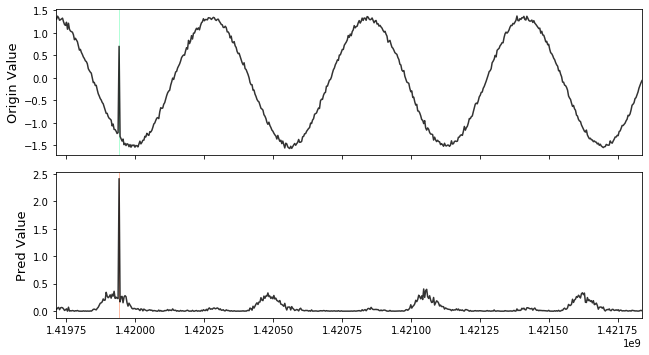

In [13]:
plot_anom(test_set, pred_label, anomaly_score)


In [14]:
precision, recall, f1, tp, tn, fp, fn = point_metrics(pred_label,test_set.iloc[:, -1].values)
print('precision:{}, recall:{}, f1:{}, tp:{}, tn:{}, fp:{}, fn:{}'.format(precision, recall, f1, tp, tn, fp, fn))

precision:0.9999999000000099, recall:0.9999999000000099, f1:0.9999998500000123, tp:1, tn:591, fp:0, fn:0


In [15]:
adjust_pred_label = adjust_predicts(pred_label,test_set.iloc[:, -1].values, delay=5)
precision, recall, f1, tp, tn, fp, fn = point_metrics(adjust_pred_label,test_set.iloc[:, -1].values)
print('precision:{}, recall:{}, f1:{}, tp:{}, tn:{}, fp:{}, fn:{}'.format(precision, recall, f1, tp, tn, fp, fn))

precision:0.9999999000000099, recall:0.9999999000000099, f1:0.9999998500000123, tp:1, tn:591, fp:0, fn:0


### save and load test

In [16]:
vae.save('s2.pt')

In [17]:
vae2 = VAE_AD(name='VAE_AD',
                 num_epochs=num_epochs,
                 batch_size=batch_size,
                 lr=lr,
                 lr_decay=lr_decay,
                 clip_norm_value=clip_norm_value,
                 weight_decay=weight_decay,
                 data_split_rate=data_split_rate,
                 window_size=window_size,
                 window_step=window_step,
                 h_dim=h_dim,
                 z_dim=z_dim)

In [18]:
vae2.load('s2.pt')

In [19]:
res = vae2.detect(test_data.value.values)

In [20]:
ori_series = res['origin_series']
anomaly_score = res['score']

In [21]:
pred_label = (anomaly_score > np.std(anomaly_score) * 5)
test_set = test_data.set_index('timestamp')[window_size - 1:]

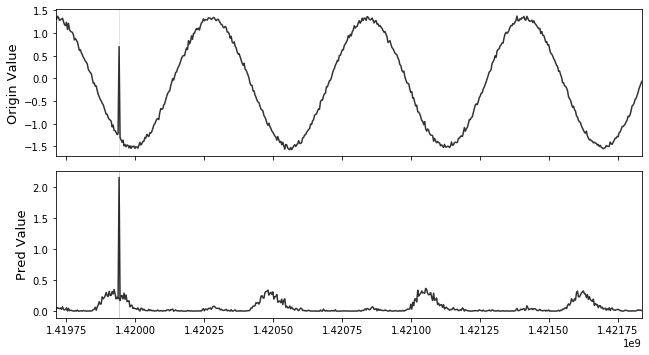

In [22]:
plot_anom(test_set, pred_label, anomaly_score)

### For an NAB sample

In [20]:
train_data, test_data = load_NAB()

load data from D:\MLlab\RealSeries\RealSeries\examples\data\NAB_data\realKnownCause\nyc_taxi.csv


In [21]:
mean_ = train_data['value'].mean()
std_ = train_data['value'].std()
train_data['value'] = train_data['value'].apply(lambda x: (x - mean_) / std_)
test_data['value'] = test_data['value'].apply(lambda x: (x - mean_) / std_)


In [23]:
vae = VAE_AD(contamination=0.1,
                 name='VAE_AD',
                 num_epochs=num_epochs,
                 batch_size=batch_size,
                 lr=lr,
                 lr_decay=lr_decay,
                 clip_norm_value=clip_norm_value,
                 weight_decay=weight_decay,
                 data_split_rate=data_split_rate,
                 window_size=window_size,
                 window_step=window_step,
                 h_dim=h_dim,
                 z_dim=z_dim)

In [24]:
vae.fit(train_data.value.values)

Epoch[1/256] Loss: 1.412899
Epoch[1/256] Loss: 1.419111
Epoch[1/256] Loss: 1.435346
Epoch[1/256] Loss: 1.395130
Epoch[1/256] Loss: 1.385986
Epoch[1/256] Loss: 1.383639
Epoch[1/256] Loss: 1.371751
Epoch[1/256] Loss: 1.360049
Epoch[1/256] Loss: 1.343090
Epoch[1/256] Loss: 1.348427
Epoch[1/256] Loss: 1.323328
Epoch[1/256] Loss: 1.318077
Epoch[1/256] Loss: 1.317245
Epoch[1/256] Loss: 1.311043
Epoch[1/256] Loss: 1.257566
Epoch[1/256] Loss: 1.261087
Epoch[1/256] Loss: 1.247787
Epoch[1/256] Loss: 1.222203
Epoch[1/256] Loss: 1.187446
Epoch[1/256] Loss: 1.153364
Epoch[21/256] Loss: 0.633490
Epoch[21/256] Loss: 0.629795
Epoch[21/256] Loss: 0.631698
Epoch[21/256] Loss: 0.635190
Epoch[21/256] Loss: 0.636507
Epoch[21/256] Loss: 0.644556
Epoch[21/256] Loss: 0.626039
Epoch[21/256] Loss: 0.634711
Epoch[21/256] Loss: 0.640580
Epoch[21/256] Loss: 0.625953
Epoch[21/256] Loss: 0.633461
Epoch[21/256] Loss: 0.618221
Epoch[21/256] Loss: 0.624594
Epoch[21/256] Loss: 0.639216
Epoch[21/256] Loss: 0.626090
Epoch

In [25]:
res = vae.detect(test_data.value.values)

In [29]:
k = 6

precision:0.9999999972972973, recall:0.03574879226707741, f1:0.06902984406866151, tp:37, tn:4006, fp:0, fn:998


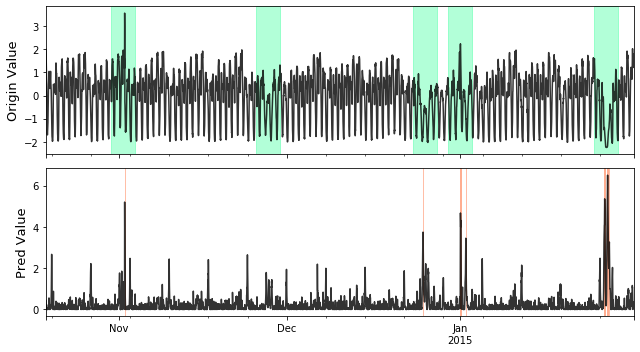

In [30]:
ori_series = res['origin_series']
anomaly_score = res['score']
pred_label = (anomaly_score > np.std(anomaly_score) * k)
test_set = test_data[window_size - 1:]
test_label = test_set.iloc[:, -1]
plot_anom(test_set, pred_label, anomaly_score)
precision, recall, f1, tp, tn, fp, fn = point_metrics(pred_label,test_label)
print('precision:{}, recall:{}, f1:{}, tp:{}, tn:{}, fp:{}, fn:{}'.format(precision, recall, f1, tp, tn, fp, fn))

precision:0.999999999879227, recall:0.7999999999227052, f1:0.8888888394107499, tp:828, tn:4006, fp:0, fn:207


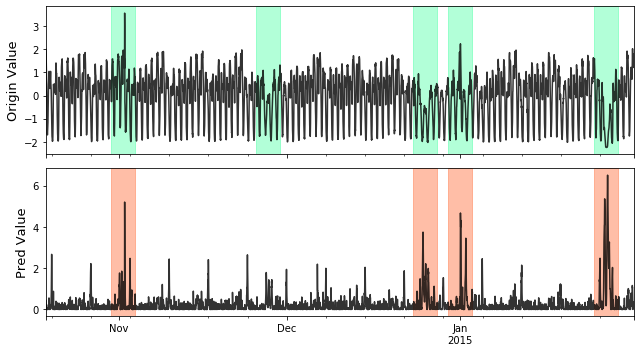

In [31]:
adjust_pred_label = adjust_predicts(pred_label,test_label,delay=200)
plot_anom(test_set, adjust_pred_label, anomaly_score)
precision, recall, f1, tp, tn, fp, fn = point_metrics(adjust_pred_label,test_label)
print('precision:{}, recall:{}, f1:{}, tp:{}, tn:{}, fp:{}, fn:{}'.format(precision, recall, f1, tp, tn, fp, fn))